In [2]:
import pandas as pd


In [4]:
df= pd.read_csv(r"C:\Users\nani siripurapu\Downloads\Job_Market_Dataset.csv")

In [5]:
df.head()

,Job_ID,Job_Title,Job_Category,Location,Year,Company,Experience_Required_Years,Salary_Min_LPA,Salary_Max_LPA,Employment_Type
0,1,Data Analyst,Data,Bangalore,2023,TCS,1,4,8,Full-Time
1,2,Data Scientist,Data,Bangalore,2024,Infosys,2,8,18,Full-Time
2,3,Business Analyst,Business,Hyderabad,2023,Accenture,2,6,12,Full-Time
3,4,ML Engineer,AI/ML,Bangalore,2025,Google,3,15,30,Full-Time
4,5,Power BI Developer,BI,Chennai,2024,Wipro,1,5,10,Full-Time


In [7]:
#data exploaration:
df.shape

(40, 10)

In [8]:
df.dtypes

Job_ID                        int64
Job_Title                    object
Job_Category                 object
Location                     object
Year                          int64
Company                      object
Experience_Required_Years     int64
Salary_Min_LPA                int64
Salary_Max_LPA                int64
Employment_Type              object
dtype: object

In [9]:
df.info

<bound method DataFrame.info of     Job_ID            Job_Title Job_Category   Location  Year        Company  \
0        1         Data Analyst         Data  Bangalore  2023            TCS   
1        2       Data Scientist         Data  Bangalore  2024        Infosys   
2        3     Business Analyst     Business  Hyderabad  2023      Accenture   
3        4          ML Engineer        AI/ML  Bangalore  2025         Google   
4        5   Power BI Developer           BI    Chennai  2024          Wipro   
5        6         Data Analyst         Data  Hyderabad  2024       Deloitte   
6        7       Data Scientist         Data       Pune  2025         Amazon   
7        8          AI Engineer        AI/ML  Bangalore  2025      Microsoft   
8        9        SQL Developer     Database    Chennai  2023            HCL   
9       10     Python Developer     Software  Hyderabad  2023  Tech Mahindra   
10      11         Data Analyst         Data     Mumbai  2025      JP Morgan   
11      

In [10]:
df.describe()

,Job_ID,Year,Experience_Required_Years,Salary_Min_LPA,Salary_Max_LPA
count,40.000000,40.00000,40.000000,40.000000,40.00000
mean,20.500000,2024.07500,2.125000,8.750000,17.32500
std,11.690452,0.79703,1.066687,5.057363,9.41463
min,1.000000,2023.00000,0.000000,3.000000,6.00000
25%,10.750000,2023.00000,1.000000,4.750000,9.75000
50%,20.500000,2024.00000,2.000000,7.000000,15.00000
75%,30.250000,2025.00000,3.000000,11.250000,21.25000
max,40.000000,2025.00000,4.000000,20.000000,40.00000


In [11]:
#  data cleaning
df.isnull().sum()

Job_ID                       0
Job_Title                    0
Job_Category                 0
Location                     0
Year                         0
Company                      0
Experience_Required_Years    0
Salary_Min_LPA               0
Salary_Max_LPA               0
Employment_Type              0
dtype: int64

In [17]:
print(df.duplicated().sum())

0


In [7]:
#DATA ANALYSIS:
a = pd.DataFrame(df.groupby('Job_Title')['Salary_Max_LPA'].mean().sort_values())
a                 
   

,Salary_Max_LPA
Job_Title,
SQL Developer,7.5
Power BI Analyst,8.0
SQL Analyst,8.0
Tableau Developer,9.0
Power BI Developer,9.5
BI Analyst,10.0
Python Developer,10.0
Data Analyst,10.0
Python Data Analyst,12.0


In [11]:
#(Ai researchers are the highest paid job)
a = pd.DataFrame(df.groupby('Job_Title')['Salary_Max_LPA'].mean().sort_values(ascending = False).head(5))
a

,Salary_Max_LPA
Job_Title,
AI Researcher,40.0
AI Consultant,38.0
AI Engineer,30.5
ML Engineer,25.2
Data Scientist,21.8


In [ ]:
Ai Researcher are the highest paid job

In [13]:
b=pd.DataFrame(df.groupby('Company')['Job_ID'].count().sort_values(ascending = False).head(5))
b

,Job_ID
Company,
Amazon,3
Infosys,2
Accenture,1
Byjus,1
BCG,1


In [ ]:
amazing provides more jobs

In [15]:

c=df.groupby('Job_Title')['Experience_Required_Years'].mean().sort_values(ascending = False).head() 
c

Job_Title
AI Consultant          4.0
AI Researcher          4.0
AI Engineer            3.0
Data Engineer          3.0
Power BI Consultant    3.0
Name: Experience_Required_Years, dtype: float64

In [ ]:

AI Consultantrole requires highest experience

In [17]:
d=pd.DataFrame(df.groupby("Location")["Job_Title"].count()) 
d

,Job_Title
Location,
Bangalore,12
Chennai,5
Delhi,4
Hyderabad,8
Mumbai,5
Pune,6


In [ ]:
 Banglore location has the maximum vacanices

In [19]:
e=df.groupby("Year")["Job_Title"].count()
e

Year
2023    11
2024    15
2025    14
Name: Job_Title, dtype: int64

In [20]:
f=pd.DataFrame(df.groupby("Company")["Salary_Max_LPA"].mean().sort_values(ascending = False).head(5)) 
f

,Salary_Max_LPA
Company,
OpenAI,40.0
McKinsey,38.0
Microsoft,35.0
Meta,35.0
Tesla,32.0


In [ ]:
OpenA provide  more salary than other companies)

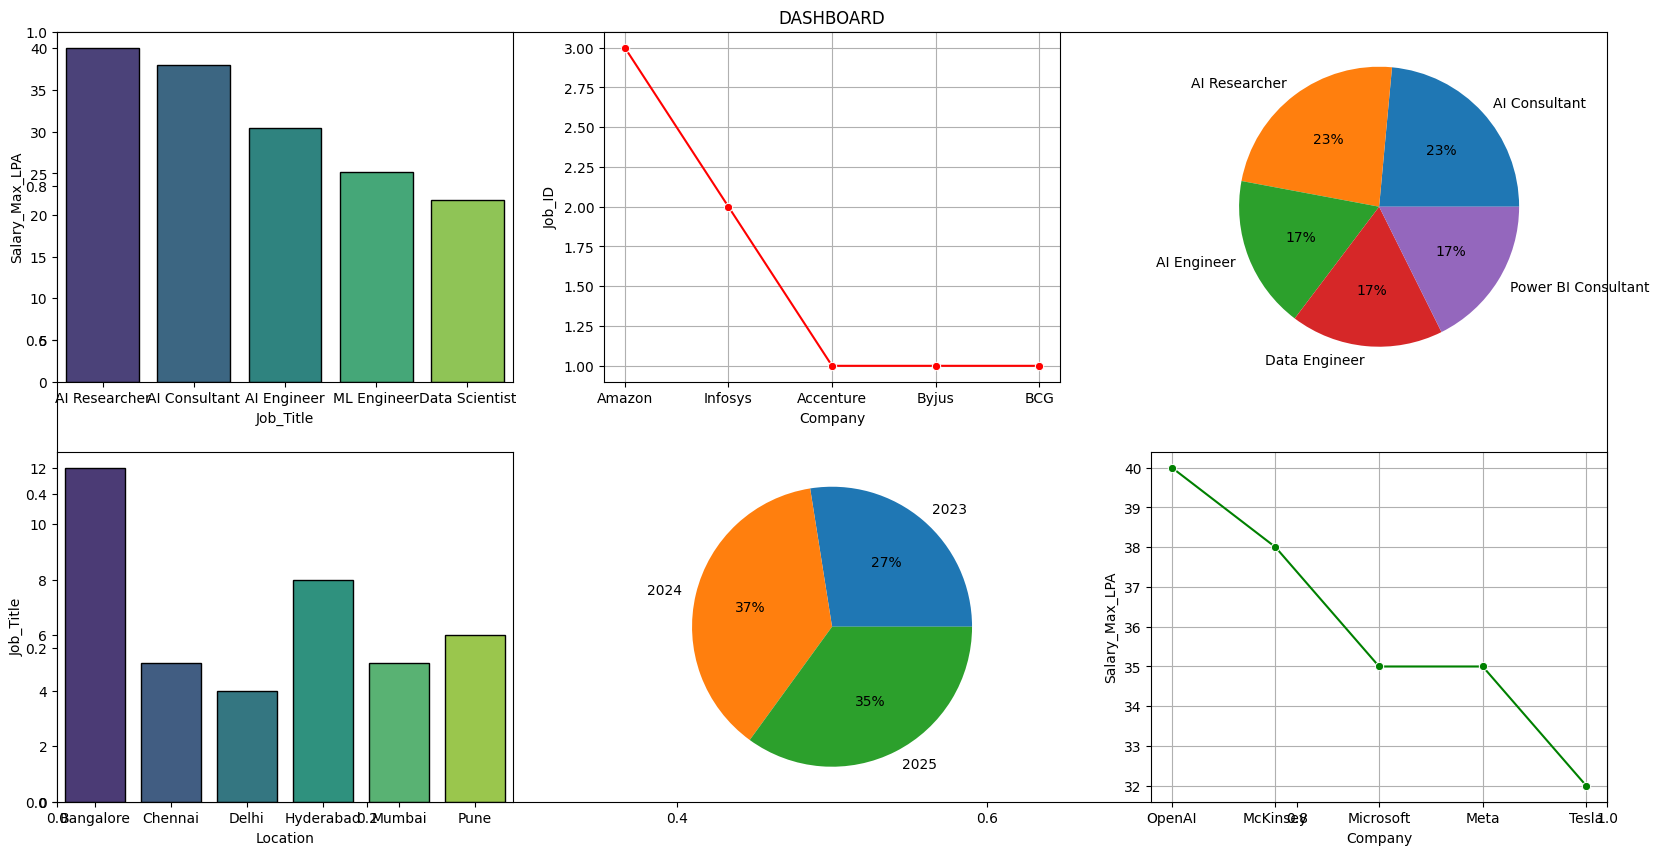

In [21]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(20,10))
plt.title("DASHBOARD")
plt.subplot(2,3,1)
sns.barplot(x="Job_Title",y="Salary_Max_LPA",data=a,palette="viridis",edgecolor="black")
plt.subplot(2,3,2)
sns.lineplot(x="Company",y="Job_ID",data=b,color="red",marker="o")
plt.grid(True)
plt.subplot(2,3,3)
plt.pie(c.values,labels=c.index,autopct="%1d%%")
plt.subplot(2,3,4)
sns.barplot(x="Location",y="Job_Title",data=d,palette="viridis",edgecolor="black")
plt.subplot(2,3,5)
plt.pie(e.values,labels=e.index,autopct="%1d%%")
plt.subplot(2,3,6)
sns.lineplot(x="Company",y="Salary_Max_LPA",data=f,color="green",marker="o")
plt.grid(True)
plt.show()